## Ejercicio 1

Utilizando el conjunto de datos "precio_casas.csv" realizar las siguientes tareas:

- Imprimir el nombre de cada columna seguido del valor medio, valor máximo y valor mínimo de dicha columna.
- Imprimir el número de filas cuya suma sea inferior a 1000
- Imprimir el nombre de las columnas cuya suma sea superior a 100000

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar los datos
df = pd.read_csv('data\precio_casas.csv', sep=';')

# Imprimir el nombre de cada columna seguido del valor medio, valor máximo y valor mínimo de dicha columna

for col in df.columns:
    print(f'{col}: \n media - {df[col].mean()} \n max - {df[col].max()} \n min -{df[col].min()}')
    print("--------------------")

# Imprimir el número de filas cuya suma sea inferior a 1000

print(f'Número de filas cuya suma es inferior a 1000: {len(df[df.sum(axis=1) < 1000])}')
print("--------------------")

# Imprimir el nombre de las columnas cuya suma sea superior a 100000

print(f'Columnas cuya suma es superior a 100000: {df.columns[df.sum() > 100000]}')
print("--------------------")

Mediana ingresos: 
 media - 3.8706710029069766 
 max - 15.0001 
 min -0.4999
--------------------
Mediana antiguedad: 
 media - 28.639486434108527 
 max - 52.0 
 min -1.0
--------------------
Num. hab. promedio: 
 media - 5.428999742190376 
 max - 141.9090909090909 
 min -0.8461538461538461
--------------------
Num. dorm. promedio: 
 media - 1.096675149606208 
 max - 34.06666666666667 
 min -0.3333333333333333
--------------------
Poblacion: 
 media - 1425.4767441860465 
 max - 35682.0 
 min -3.0
--------------------
Ocup. promedio: 
 media - 3.0706551594363742 
 max - 1243.3333333333333 
 min -0.6923076923076923
--------------------
Latitud: 
 media - 35.63186143410853 
 max - 41.95 
 min -32.54
--------------------
Longitud: 
 media - -119.56970445736432 
 max - -114.31 
 min --124.35
--------------------
Mediana precio: 
 media - 2.068558169089147 
 max - 5.00001 
 min -0.14999
--------------------
Número de filas cuya suma es inferior a 1000: 8648
--------------------
Columnas cuya

## Ejercicio 2

Utilizando el conjunto de datos "precio_casas-perdidos.csv" realizar las siguientes tareas:

- Imprimir el nombre de las columnas que posean algún valor perdido y el número de valores perdidos.
- Para cada columna con valores perdidos, sustituir los que se encuentren en las 1000 primeras filas por la media de la columna.
- Representar gráficamente los valores de las columnas que no poseen valores perdidos. La gráfica debe tener como titulo el nombre de la columna que representa.

Mediana ingresos: 191
Mediana antiguedad: 204
Num. hab. promedio: 189
Num. dorm. promedio: 180
Poblacion: 182
Ocup. promedio: 181
Latitud: 172
Longitud: 192


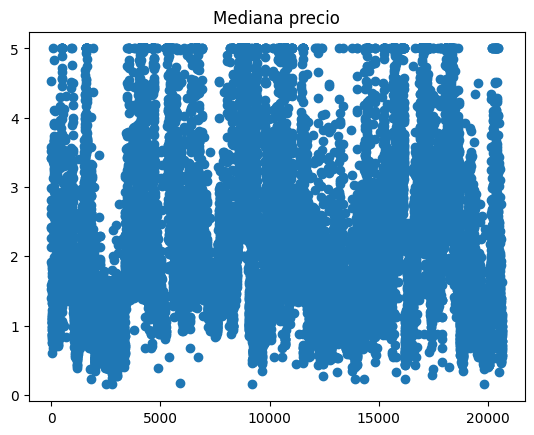

In [35]:
df = pd.read_csv('data\precio_casas-perdidos.csv')

# Imprimir el nombre de las columnas que posean algún valor perdido y el número de valores perdidos

for col in df.columns:
    if df[col].isnull().sum() > 0:
        print(f'{col}: {df[col].isnull().sum()}')

# Para cada columna con valores perdidos, sustituir los que se encuentren en las 1000 primeras filas por la media de la columna

for col in df.columns:
    if df[col].isnull().sum() > 0:
        df.loc[:1000, col] = df[col].fillna(df[col].mean())

# Representar gráficamente los valores de las columnas que no poseen valores perdidos. La gráfica debe tener como título el nombre de la columna que representa

for col in df.columns:
    if df[col].isnull().sum() == 0:
        plt.figure()
        plt.title(col)
        plt.scatter(range(len(df[col])), df[col])
        plt.show()

## Ejercicio 3

Utilizando el conjunto de datos "precio_casas.csv" realizar las siguientes tareas:

- Obtener un estimador basado en regresión lineal de la variable "Mediana precio" a partir del resto.
- Mostrar por pantalla los coeficientes de regresión del estimador antes calculado.
- Mostrar mediante un gráfico de barras los coeficientes de regresión.

Coeficientes: [ 4.35259806e-01  9.70535910e-03 -1.07830035e-01  6.12080982e-01
 -2.57526965e-07 -3.92693006e-03 -4.17083310e-01 -4.29542000e-01]


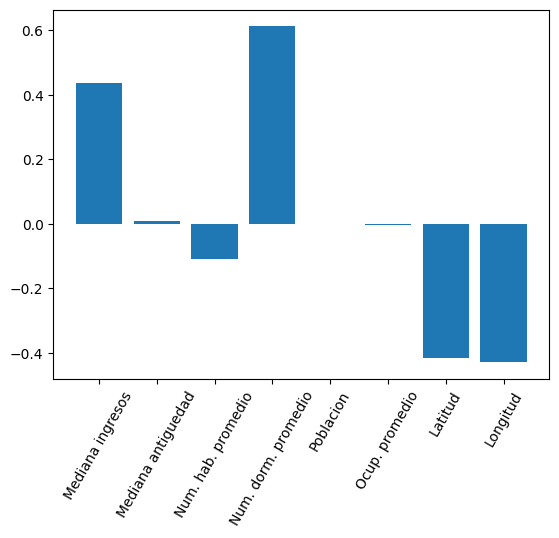

In [ ]:
df = pd.read_csv('data\precio_casas.csv', sep=';')

# Obtener un estimador basado en regresión lineal de la variable "Mediana precio" a partir del resto
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = df.drop('Mediana precio', axis = 1)
y = df['Mediana precio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Mostrar por pantalla los coeficientes de regresión del estimador antes calculado

print(f'Coeficientes: {model.coef_}')

# Mostrar mediante un gráfico de barras los coeficientes de regresión

plt.bar(X.columns, model.coef_)
plt.xticks(rotation=60)
plt.show()

## Ejercicio 4

Utilizando el conjunto de datos "precio_casas.csv" realizar las siguientes tareas:

- Dividir el conjunto de datos en dos subconjuntos: entrenamiento con el 80% de las muestras y test con las restantes.
- Obtener un estimador basado en regresión lineal de la variable "Mediana precio" a partir del resto.
- Mostrar el RMSE y el $R^2$ tanto para el conjunto de entrenamiento como para el de test.
- Obtener un estimador utilizando las 3 variables con mayor $R^2$ del conjunto completo.
- Mostrar el RMSE y el $R^2$ del estimador anterior para el conjunto de entrenamiento y el de test.

In [65]:
df = pd.read_csv('data\precio_casas.csv', sep=';')

# Dividir el conjunto de datos en dos subconjuntos: entrenamiento con el 80% de las muestras y test con las restantes

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Obtener un estimador basado en regresión lineal de la variable "Mediana precio" a partir del resto

model = LinearRegression()
model.fit(X_train, y_train)

# Mostrar el RMSE y el R^2 tanto para el conjunto de entrenamiento como para el de test

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print(f'RMSE train: {mean_squared_error(y_train, y_pred_train)}')
print(f'RMSE test: {mean_squared_error(y_test, y_pred_test)}')

print(f'R^2 train: {model.score(X_train, y_train)}')
print(f'R^2 test: {model.score(X_test, y_test)}')

# Obtener un estimador utilizando las 3 variables con mayor R^2 del conjunto completo.

model = LinearRegression()
r2_scores = {}
for col in X.columns:
    model.fit(X[[col]], y)
    r2_scores[col] = model.score(X[[col]], y)

top_3 = sorted(r2_scores, key=r2_scores.get, reverse = True)[:3]

X_top3 = X[top_3]

X_train, X_test, y_train, y_test = train_test_split(X_top3, y, test_size=0.2)

model.fit(X_train, y_train)

print(f'Top 3: {top_3}')
print(f'Coeficientes: {model.coef_}')
print(f'R^2: {model.score(X_train, y_train)}')

model.fit(X_test, y_test)
print(f'R^2: {model.score(X_test, y_test)}')
print(f'Coeficientes: {model.coef_}')

RMSE train: 0.5166935416690901
RMSE test: 0.5562438993075492
R^2 train: 0.6084892601895058
R^2 test: 0.5964184080460493
Top 3: ['Mediana ingresos', 'Num. hab. promedio', 'Latitud']
Coeficientes: [ 0.42732606 -0.03547538 -0.04257378]
R^2: 0.48228622126208376
R^2: 0.49999079100856136
Coeficientes: [ 0.43162696 -0.02460437 -0.04683014]


## Ejercicio 5

Utilizando el conjunto de datos "precio_casas.csv" realizar las siguientes tareas:

- Dividir el conjunto de datos en dos subconjuntos: entrenamiento con el 80% de las muestras y test con las restantes.
- Obtener un estimador univariable basado en regresión lineal para la variable "Mediana precio".
- Para las 4 variables con menor RMSE en el conjunto de test, mostrar gráficamente las muestras del conjunto de entrenamiento y la recta de regresión obtenida.
- Para las 4 variables con menor RMSE en el conjunto de test, mostrar gráficamente las muestras del conjunto de test y la recta de regresión obtenida.

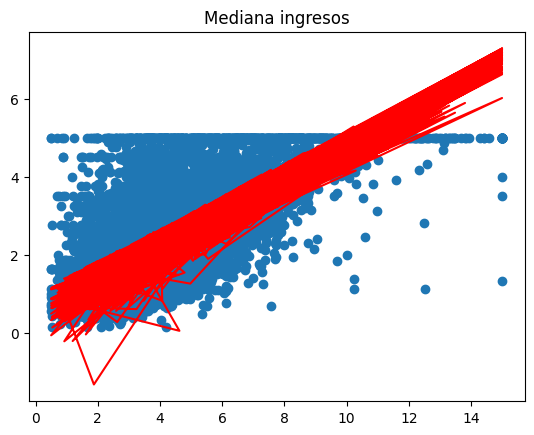

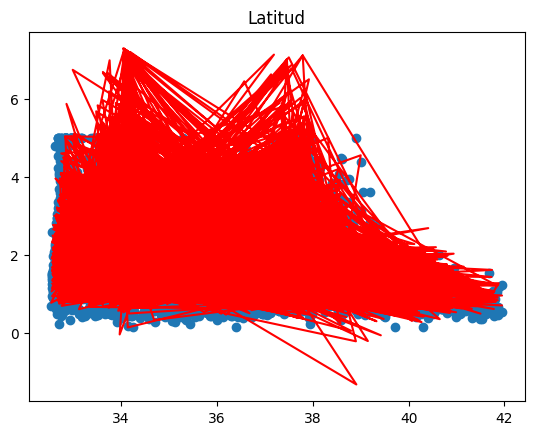

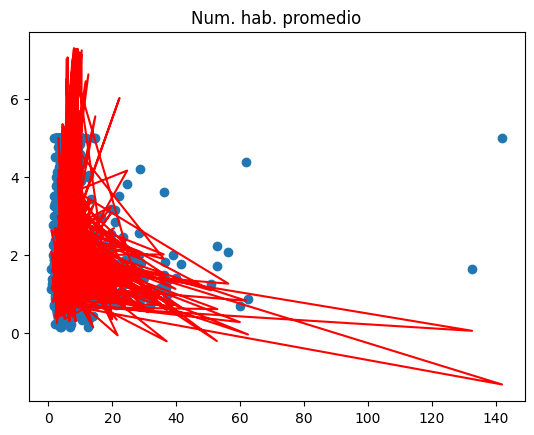

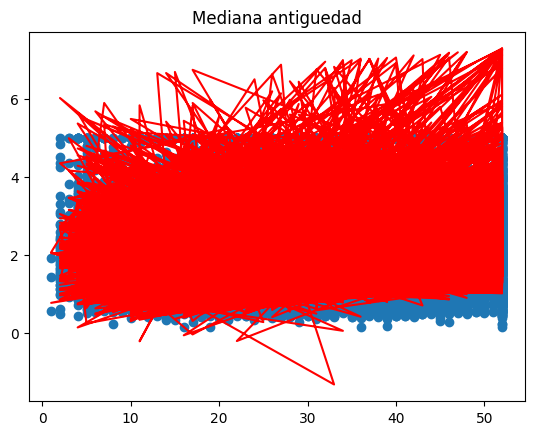

In [70]:
df = pd.read_csv('data\precio_casas.csv', sep=';')

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Obtener un estimador basado en regresión lineal para la variable "Mediana precio"

model = LinearRegression()
model.fit(X_train, y_train)

# Para las 4 variables con menor RMSE en el conjunto de test, mostrar gráficamente las muestras del conjunto de entrenamiento y la recta de regresión obtenida

y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred)

rmse_scores = {}
for col in X.columns:
    model.fit(X_train[[col]], y_train)
    y_pred = model.predict(X_test[[col]])
    rmse_scores[col] = mean_squared_error(y_test, y_pred)

top_4 = sorted(rmse_scores, key=rmse_scores.get)[:4]

X_top4 = X[top_4]

X_train, X_test, y_train, y_test = train_test_split(X_top4, y, test_size=0.2)

model.fit(X_train, y_train)

for col in X_top4.columns:
    plt.figure()
    plt.title(col)
    plt.scatter(X_train[col], y_train)
    plt.plot(X_train[col], model.predict(X_train), color='red')
    plt.show()






